In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X =torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels=synthetic_data(true_w, true_b, 1000)
true_w.device, features.device, labels.device

(device(type='cpu'), device(type='cpu'), device(type='cpu'))

In [8]:
print('features:', features[0], '\nlabel:', labels[0])
print(len(features))

features: tensor([0.5333, 0.6683]) 
label: tensor([2.9890])
1000


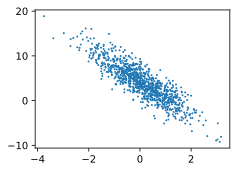

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [10]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size=10
t=0
for X,y in data_iter(batch_size,features,labels):
    t+=1
    print(X,y,t)

tensor([[-0.2776, -0.6333],
        [-0.7521, -0.4417],
        [ 0.6936,  0.4972],
        [ 2.0225,  0.3421],
        [ 0.7338, -0.6151],
        [-1.1753,  1.3935],
        [-2.2316, -0.6109],
        [ 0.2043, -0.9516],
        [ 0.0860,  1.4040],
        [-2.2123,  0.0365]]) tensor([[ 5.8026],
        [ 4.2241],
        [ 3.8958],
        [ 7.0754],
        [ 7.7569],
        [-2.8958],
        [ 1.8257],
        [ 7.8423],
        [-0.4030],
        [-0.3331]]) 1
tensor([[-0.6207,  0.5044],
        [ 0.6092,  0.8169],
        [-0.2561,  1.1091],
        [ 0.3495, -0.2423],
        [-0.1003, -1.5927],
        [-0.9212,  0.4400],
        [ 1.0746,  0.3724],
        [-0.9775, -0.0175],
        [ 2.6433,  0.7958],
        [-1.4229, -0.8826]]) tensor([[ 1.2354],
        [ 2.6350],
        [-0.0784],
        [ 5.7168],
        [ 9.4341],
        [ 0.8749],
        [ 5.0894],
        [ 2.3040],
        [ 6.8062],
        [ 4.3346]]) 2
tensor([[-0.8785,  0.5755],
        [ 1.9242,  0.346

In [11]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
print(w,b)

tensor([[-0.0107],
        [ 0.0223]], requires_grad=True) tensor([0.], requires_grad=True)


In [12]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [13]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [14]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

In [15]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.041831
epoch 2, loss 0.000195
epoch 3, loss 0.000050


In [16]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0009, -0.0008], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0015], grad_fn=<RsubBackward1>)
